In [1]:
import sqlite3
from pathlib import Path

__file__ = %pwd
DATA = Path(__file__).parent.parent / "data"
PRIORITIES = DATA / "Priorities"
DATABASE = DATA / "databases" / "exploration.db"

import sys
sys.path.append(str(DATA.parent))  # Add the parent directory of 'modeling' to the Python path

con = sqlite3.connect(DATABASE)
cur = con.cursor()

In [2]:
import pandas as pd
import numpy as np

df_2016_17 = pd.read_sql_query(
    "SELECT * FROM ACGRWide WHERE Year = '2016-17' and CharterSchool = 'No '", con
)
df_2017_18 = pd.read_sql_query(
    "SELECT * FROM ACGRWide WHERE Year = '2017-18' and CharterSchool = 'No '", con
)
df_2018_19 = pd.read_sql_query(
    "SELECT * FROM ACGRWide WHERE Year = '2018-19' and CharterSchool = 'No '", con
)
df_2019_20 = pd.read_sql_query(
    "SELECT * FROM ACGRWide WHERE Year = '2019-20' and CharterSchool = 'No '", con
)
df_2020_21 = pd.read_sql_query(
    "SELECT * FROM ACGRWide WHERE Year = '2020-21' and CharterSchool = 'No '", con
)
df_2021_22 = pd.read_sql_query(
    "SELECT * FROM ACGRWide WHERE Year = '2021-22' and CharterSchool = 'No '", con
)
df_2022_23 = pd.read_sql_query(
    "SELECT * FROM ACGRWide WHERE Year = '2022-23' and CharterSchool = 'No '", con
)
df_2023_24 = pd.read_sql_query(
    "SELECT * FROM ACGRWide WHERE Year = '2023-24' and CharterSchool = 'No '", con
)

year_df_mapping = {
    2016: df_2016_17,
    2017: df_2017_18,
    2018: df_2018_19,
    2019: df_2019_20,
    2020: df_2020_21,
    2021: df_2021_22,
    2022: df_2022_23,
    2023: df_2023_24,
}
grad_rate_columns_to_drop = [
    col
    for col in df_2016_17.columns
    if col.startswith("RegHSDiploma") or col.startswith("Dropout")
]
csu_rate_columns_to_drop = [
    col for col in df_2016_17.columns if col.startswith("UniReqs")
]

## XGBoost


### Cross-Validated Grad Rate


Cross-Validation Results for RegHSDiplomaRate.TA (5 folds) for 2016-17:
RMSE: 5.0369 ± 0.2495
MAE: 2.5415 ± 0.0336
R^2: 0.9640 ± 0.0015
Cross-Validation Results for RegHSDiplomaRate.TA (5 folds) for 2017-18:
RMSE: 4.7146 ± 0.4559
MAE: 2.5867 ± 0.1774
R^2: 0.9669 ± 0.0030
Cross-Validation Results for RegHSDiplomaRate.TA (5 folds) for 2018-19:
RMSE: 4.2064 ± 0.3836
MAE: 2.2491 ± 0.1271
R^2: 0.9722 ± 0.0045
Cross-Validation Results for RegHSDiplomaRate.TA (5 folds) for 2019-20:
RMSE: 5.1830 ± 0.6000
MAE: 2.6199 ± 0.2163
R^2: 0.9567 ± 0.0090
Cross-Validation Results for RegHSDiplomaRate.TA (5 folds) for 2020-21:
RMSE: 5.3321 ± 0.4465
MAE: 2.7812 ± 0.1878
R^2: 0.9518 ± 0.0068
Cross-Validation Results for RegHSDiplomaRate.TA (5 folds) for 2021-22:
RMSE: 8.2751 ± 0.9029
MAE: 4.2722 ± 0.5342
R^2: 0.8189 ± 0.0448
Cross-Validation Results for RegHSDiplomaRate.TA (5 folds) for 2022-23:
RMSE: 9.6717 ± 1.0780
MAE: 4.9512 ± 0.1804
R^2: 0.7794 ± 0.0195
Cross-Validation Results for RegHSDiplomaRate.TA

<Figure size 1400x600 with 0 Axes>

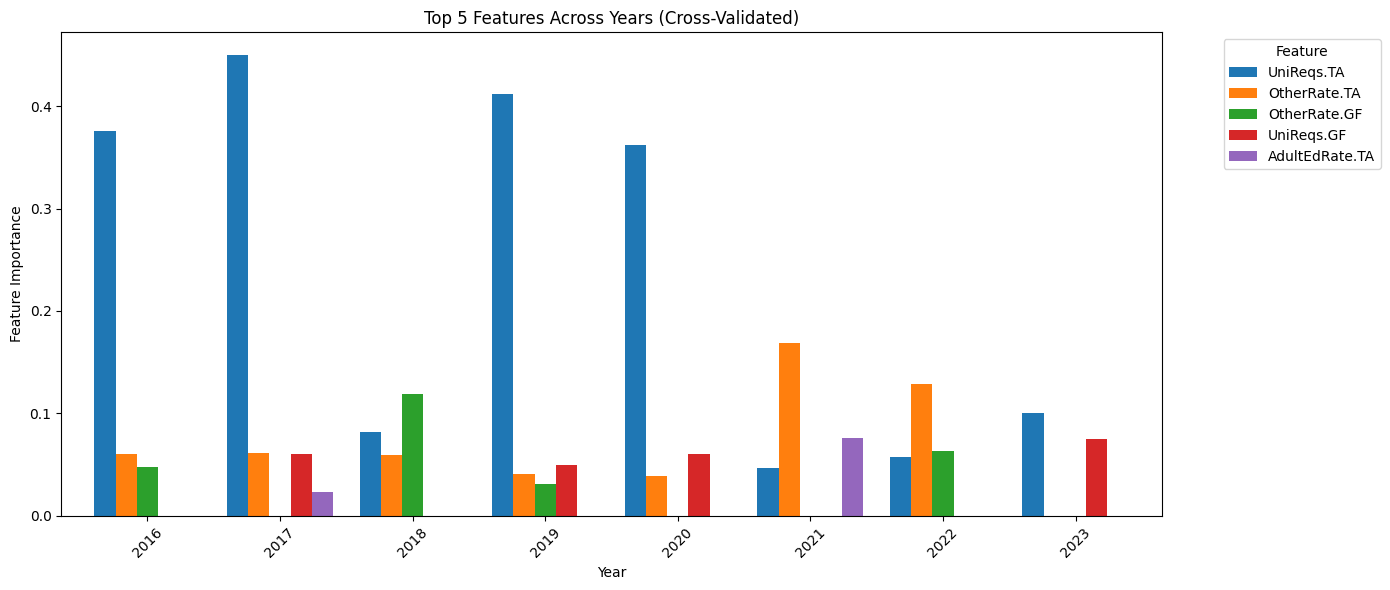

In [3]:
from modeling.utils.xgboost import cross_validate_xgboost, plot_cv_feature_importance
from modeling.utils.xgboost import (
    plot_top_k_features,
    plot_feature_avg_variance,
    plot_feature_time_series,
)

cv_xgb_models = {}

target_column = "RegHSDiplomaRate.TA"

for year, year_df in year_df_mapping.items():

    cv_result = cross_validate_xgboost(
        df=year_df,
        target_column=target_column,
        columns_to_drop=[target_column, "Year"] + grad_rate_columns_to_drop,
        n_splits=5,
        print_results=True,
        n_jobs=-1,
    )

    cv_xgb_models[year] = cv_result

top_features = plot_cv_feature_importance(cv_xgb_models, top_n=5)

<Figure size 1400x600 with 0 Axes>

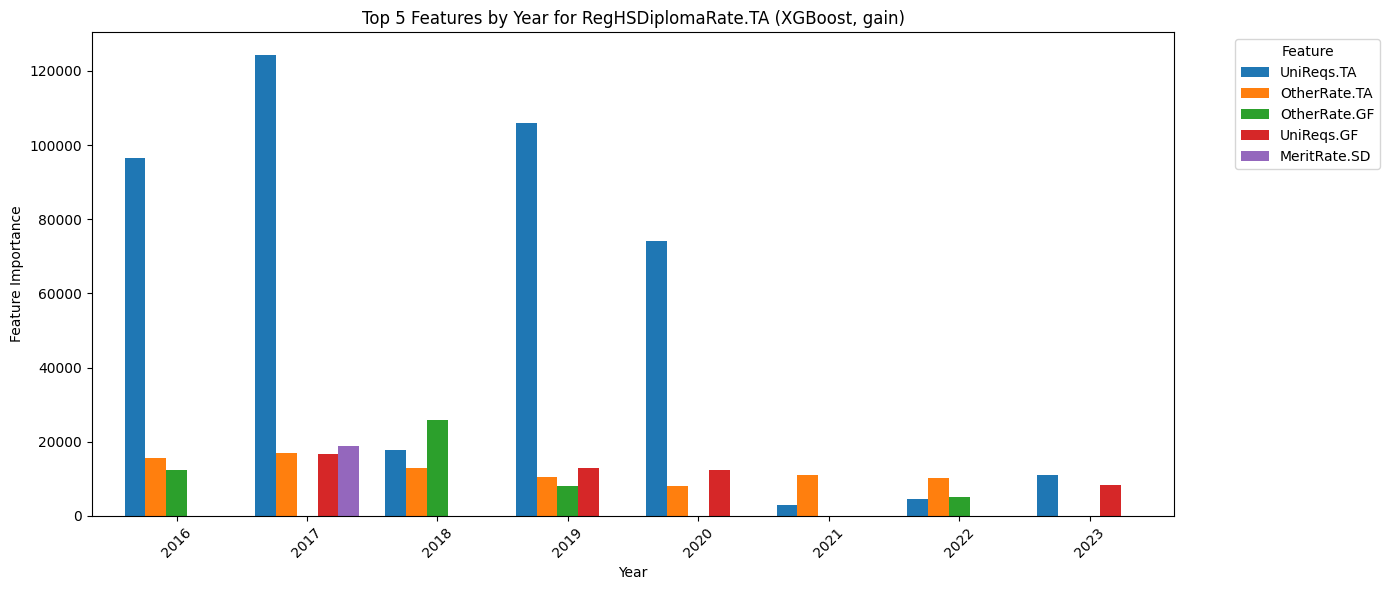

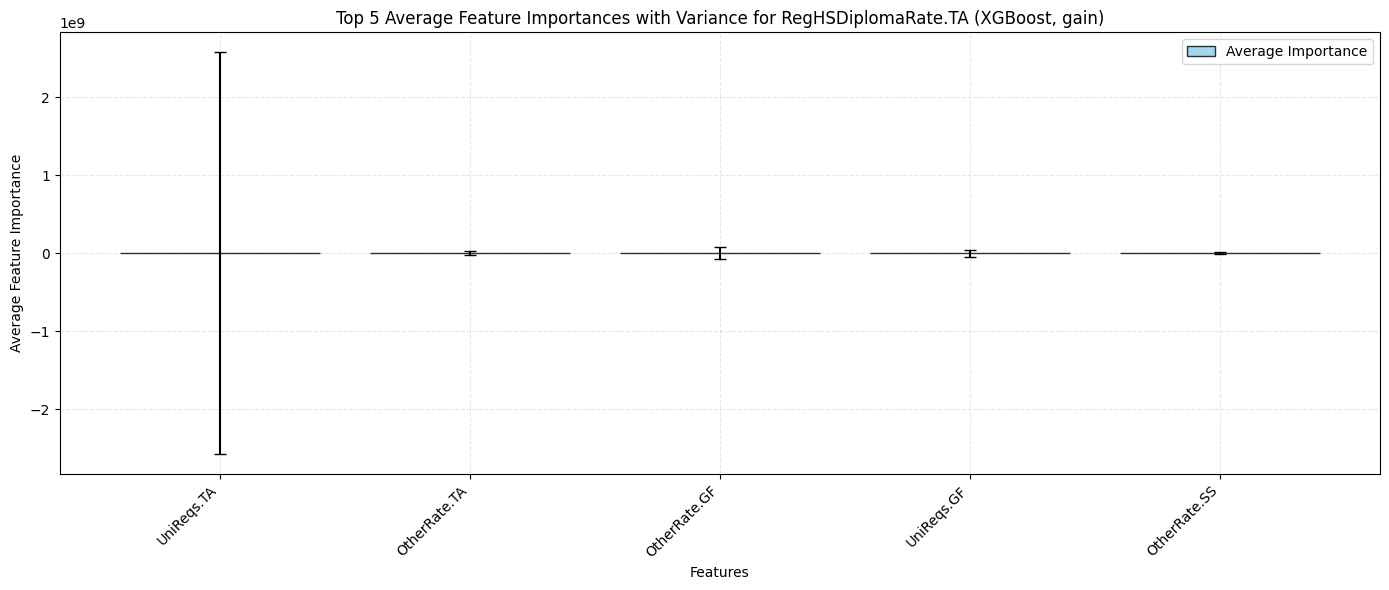

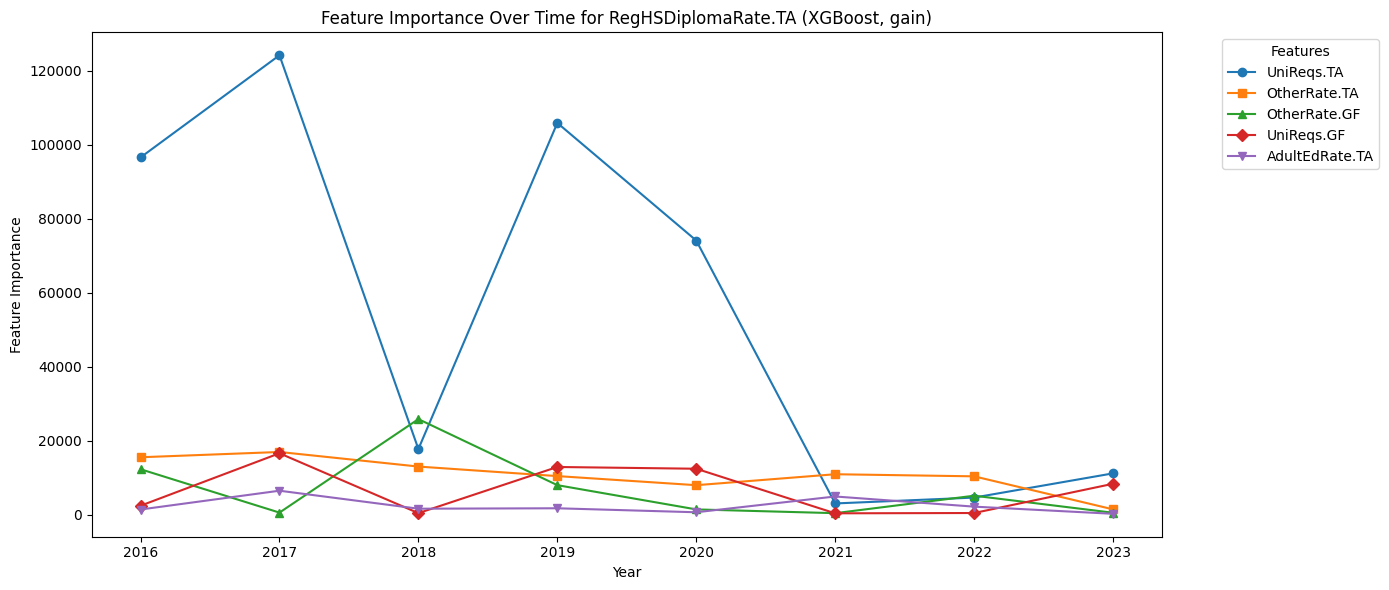

In [4]:
plot_top_k_features(cv_xgb_models, "XGBoost", "gain", target_column, k=5)
plot_feature_avg_variance(cv_xgb_models, "XGBoost", "gain", target_column)
plot_feature_time_series(
    cv_xgb_models, "XGBoost", "gain", target_column, top_features[:5]
)

### Cross-Validated CSU/UC Readiness Rate


In [5]:
from modeling.utils.xgboost import cross_validate_xgboost, plot_cv_feature_importance
from modeling.utils.xgboost import (
    plot_top_k_features,
    plot_feature_avg_variance,
    plot_feature_time_series,
)

cv_xgb_models = {}

target_column = "UniReqsPercent.TA"

for year, year_df in year_df_mapping.items():

    cv_result = cross_validate_xgboost(
        df=year_df,
        target_column=target_column,
        columns_to_drop=[target_column, "Year"] + csu_rate_columns_to_drop,
        n_splits=5,
        print_results=True,
        n_jobs=-1
    )

    cv_xgb_models[year] = cv_result


Cross-Validation Results for UniReqsPercent.TA (5 folds) for 2016-17:
RMSE: 7.6702 ± 0.3495
MAE: 4.5447 ± 0.2993
R^2: 0.9267 ± 0.0069
Cross-Validation Results for UniReqsPercent.TA (5 folds) for 2017-18:
RMSE: 7.3088 ± 0.8608
MAE: 4.3605 ± 0.3585
R^2: 0.9338 ± 0.0148
Cross-Validation Results for UniReqsPercent.TA (5 folds) for 2018-19:
RMSE: 8.0760 ± 0.5244
MAE: 4.8356 ± 0.2150
R^2: 0.9205 ± 0.0086
Cross-Validation Results for UniReqsPercent.TA (5 folds) for 2019-20:
RMSE: 7.2320 ± 0.9051
MAE: 4.2324 ± 0.2275
R^2: 0.9351 ± 0.0170
Cross-Validation Results for UniReqsPercent.TA (5 folds) for 2020-21:
RMSE: 7.5631 ± 0.8146
MAE: 4.6563 ± 0.2037
R^2: 0.9298 ± 0.0159
Cross-Validation Results for UniReqsPercent.TA (5 folds) for 2021-22:
RMSE: 12.1872 ± 0.7935
MAE: 8.3000 ± 0.5428
R^2: 0.8177 ± 0.0175
Cross-Validation Results for UniReqsPercent.TA (5 folds) for 2022-23:
RMSE: 13.7501 ± 1.0762
MAE: 9.2654 ± 0.7397
R^2: 0.7758 ± 0.0457
Cross-Validation Results for UniReqsPercent.TA (5 folds) for

<Figure size 1400x600 with 0 Axes>

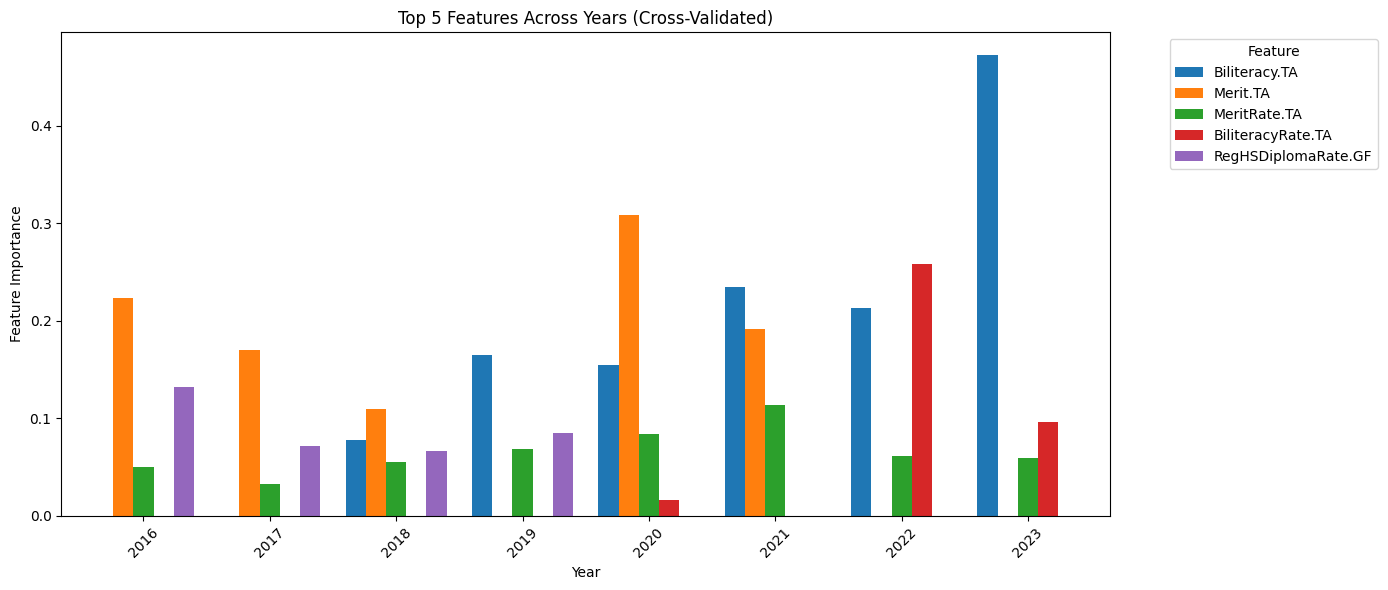

<Figure size 1400x600 with 0 Axes>

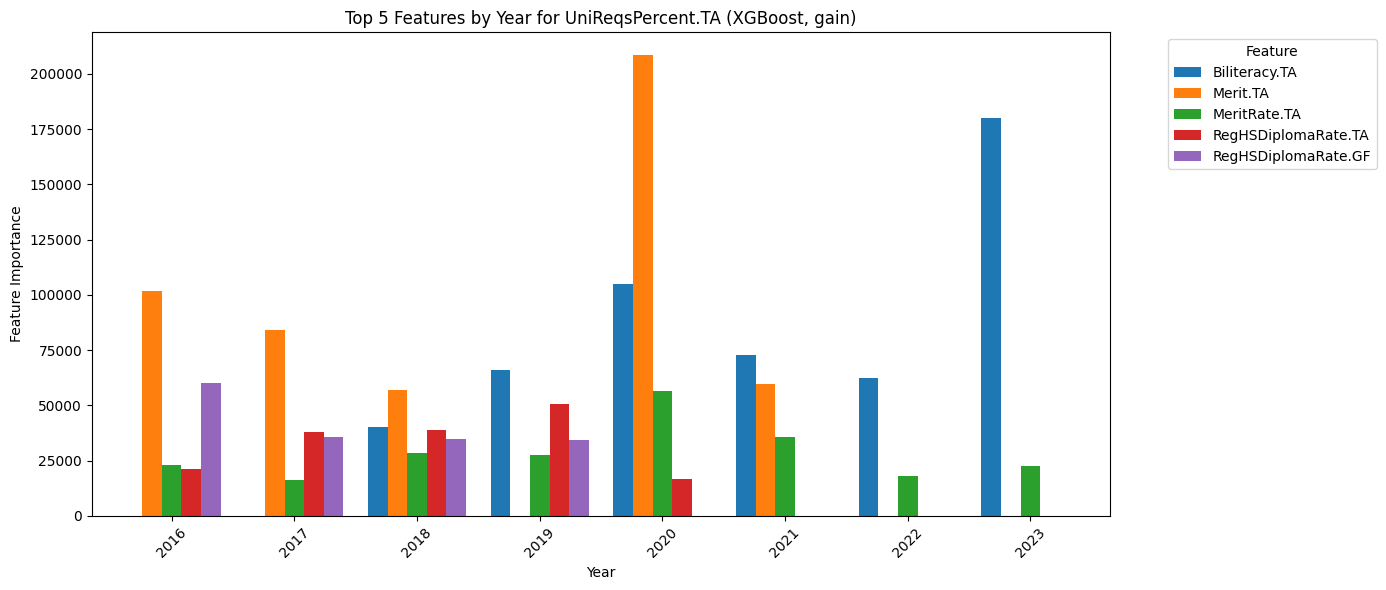

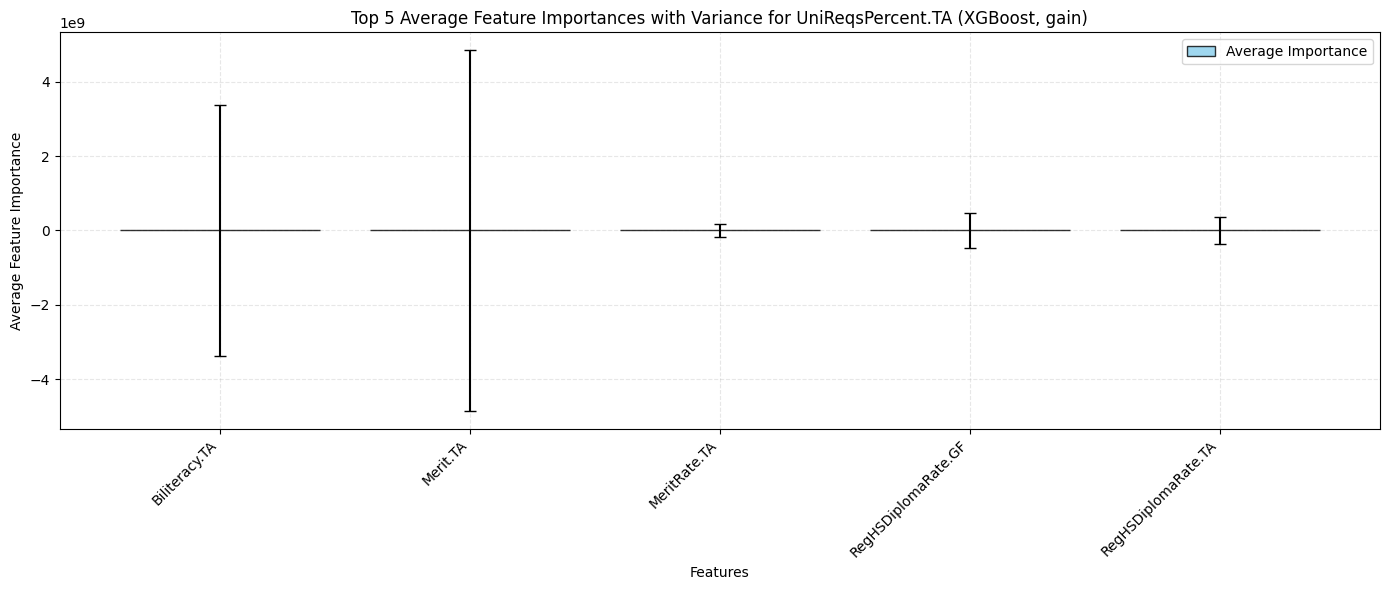

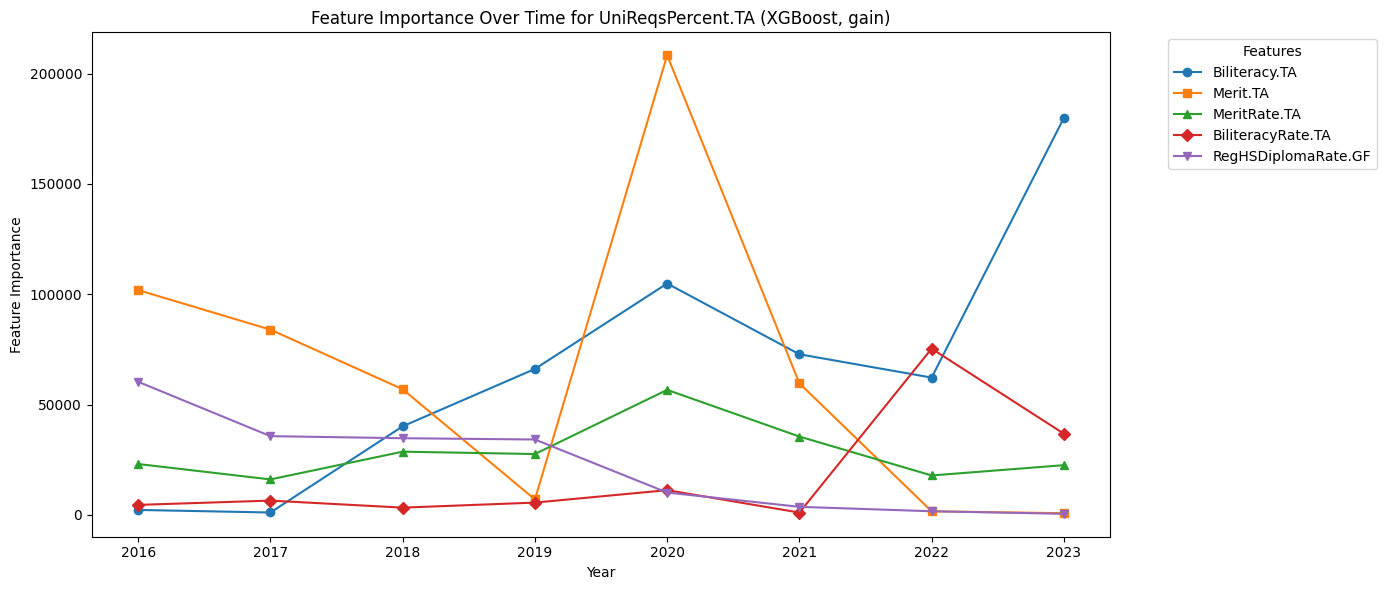

In [6]:
top_features = plot_cv_feature_importance(cv_xgb_models, top_n=5)
plot_top_k_features(cv_xgb_models, "XGBoost", "gain", target_column, k=5)
plot_feature_avg_variance(cv_xgb_models, "XGBoost", "gain", target_column)
plot_feature_time_series(
    cv_xgb_models, "XGBoost", "gain", target_column, top_features[:5]
)

### Non-Cross Validated Grad Rate


In [7]:
import modeling.utils.xgboost as xgb

grad_rate = "RegHSDiplomaRate.TA"
xgb_model = "XGBoost"

all_grad_rate_models = {}
for year, df in year_df_mapping.items():
    all_grad_rate_models[year] = xgb.train_xgboost_model(
        df, grad_rate, grad_rate_columns_to_drop, print_plot=False
    )

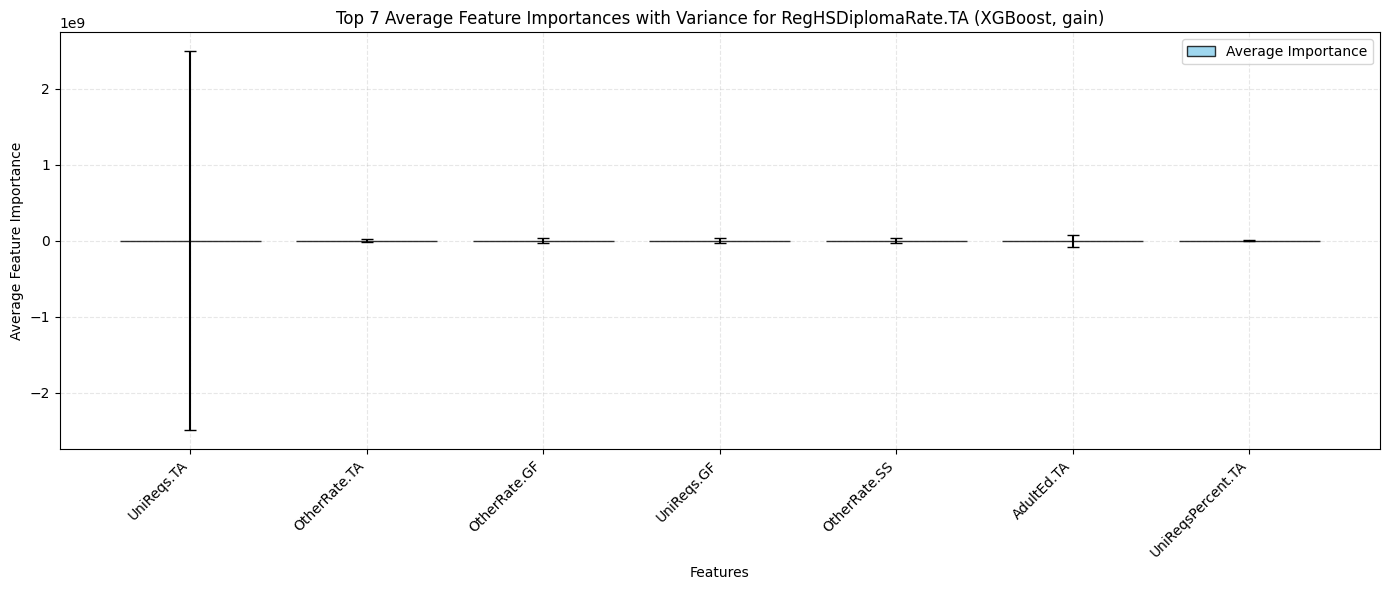

<Figure size 1400x600 with 0 Axes>

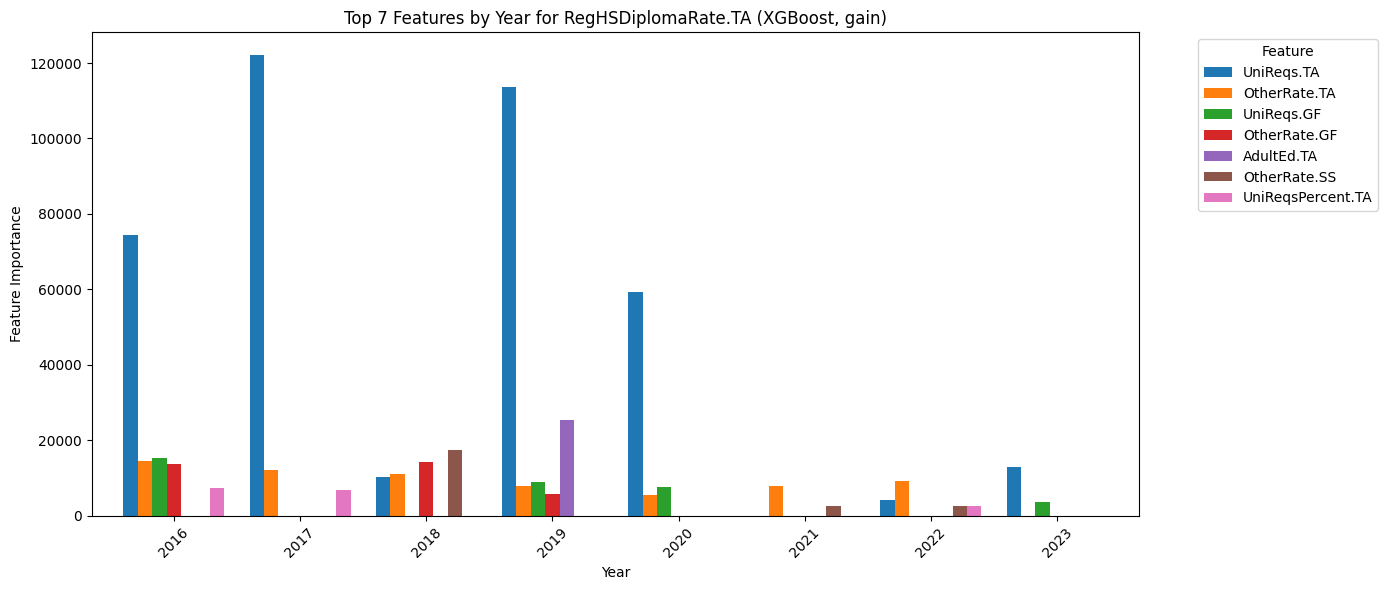

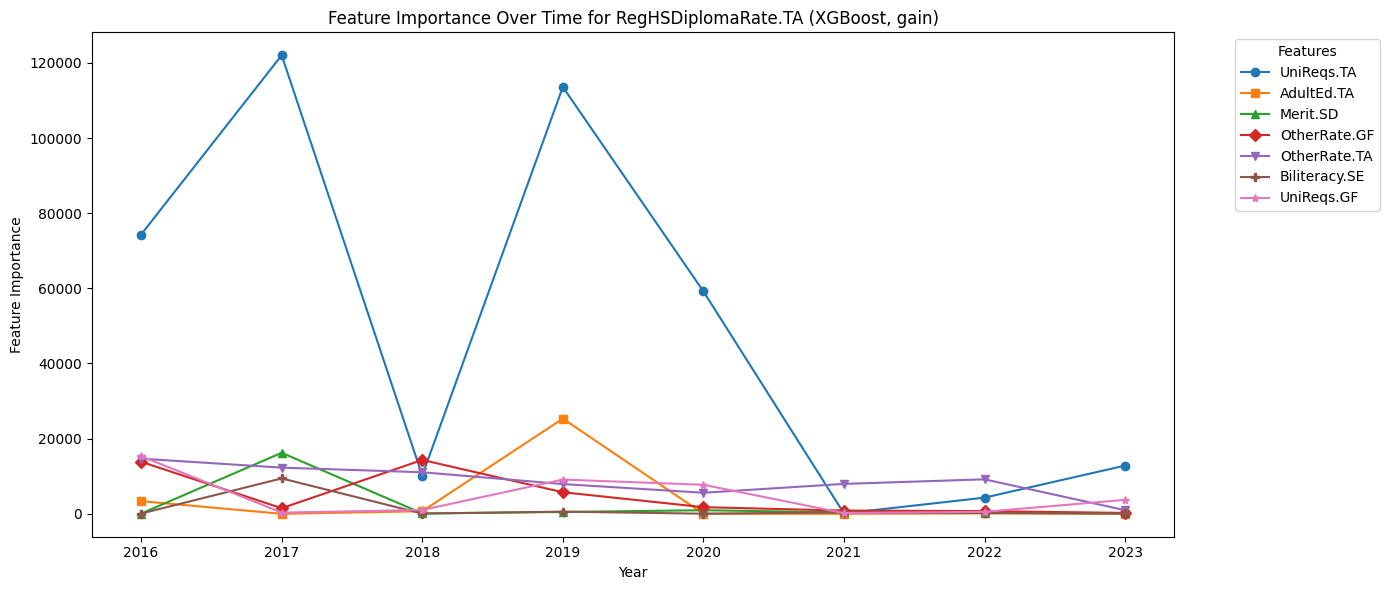

In [8]:
xgb.plot_feature_avg_variance(all_grad_rate_models, xgb_model, "gain", grad_rate, k=7)
top_k_features = xgb.plot_top_k_features(
    all_grad_rate_models, xgb_model, "gain", grad_rate, k=7
)
xgb.plot_feature_time_series(
    all_grad_rate_models, xgb_model, "gain", grad_rate, top_k_features
)

### Non Cross-Validated CSU/UC Readiness Rate


In [9]:
import modeling.utils.xgboost as xgb

uc_csu_rate = "UniReqsPercent.TA"
xgb_model = "XGBoost"

all_csu_rate_models = {}
for year, df in year_df_mapping.items():
    all_csu_rate_models[year] = xgb.train_xgboost_model(
        df, grad_rate, csu_rate_columns_to_drop, print_plot=False
    )

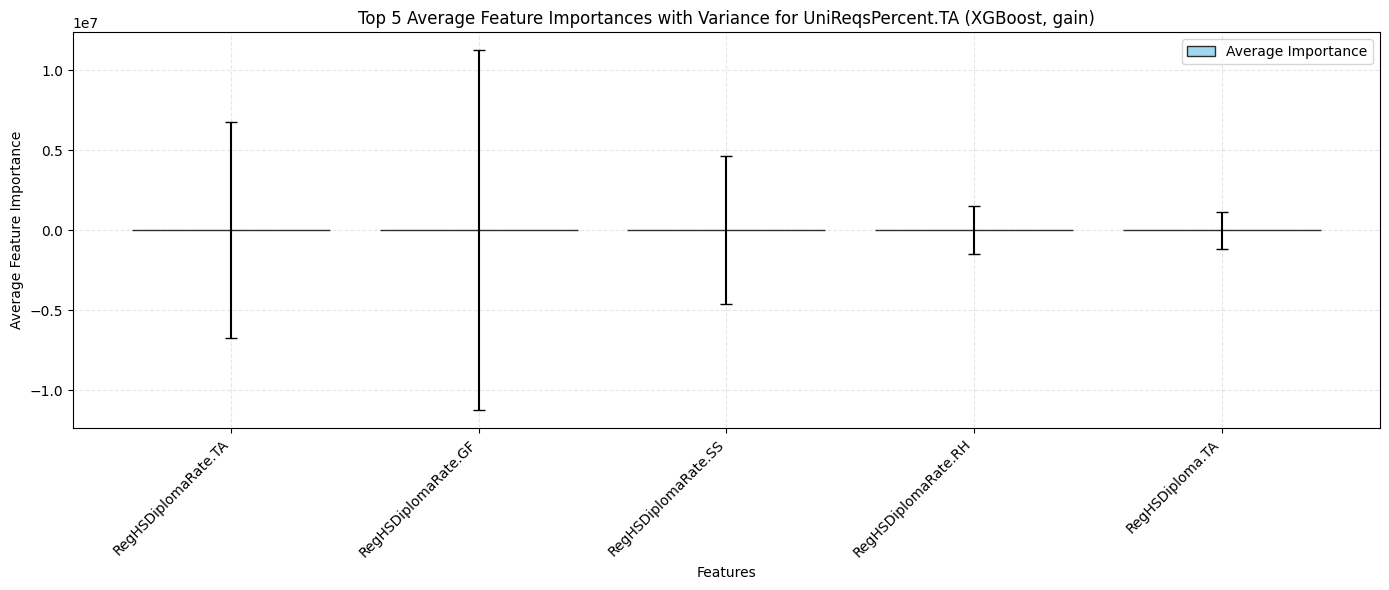

<Figure size 1400x600 with 0 Axes>

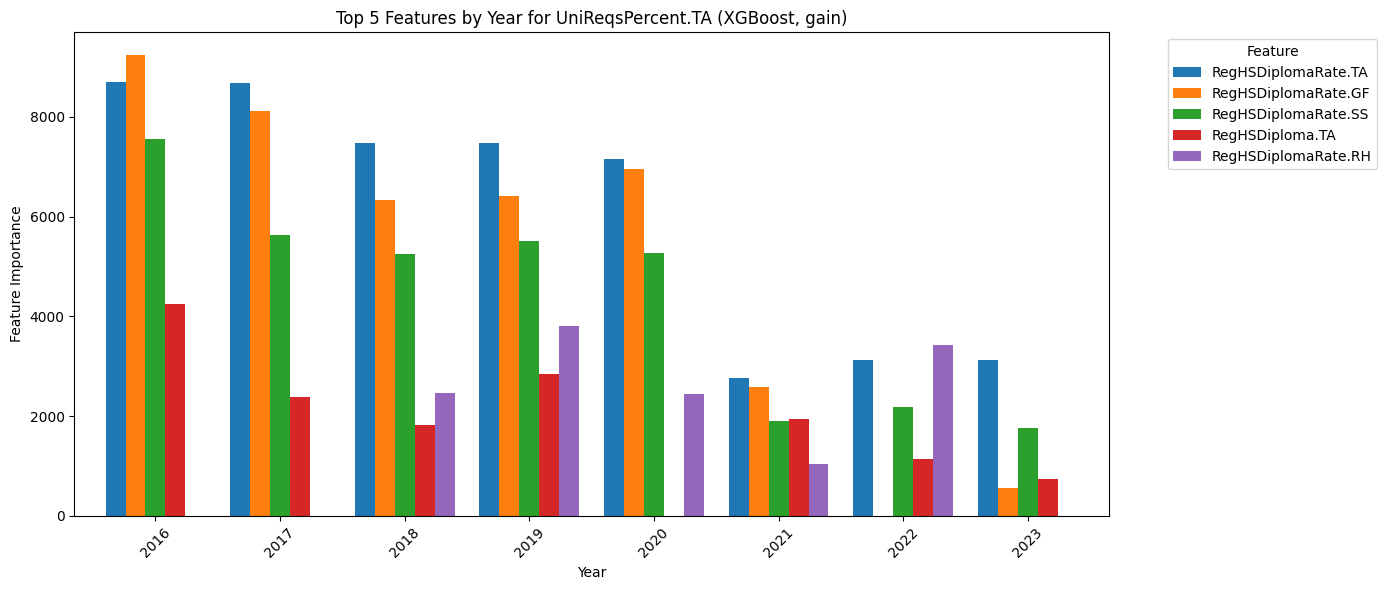

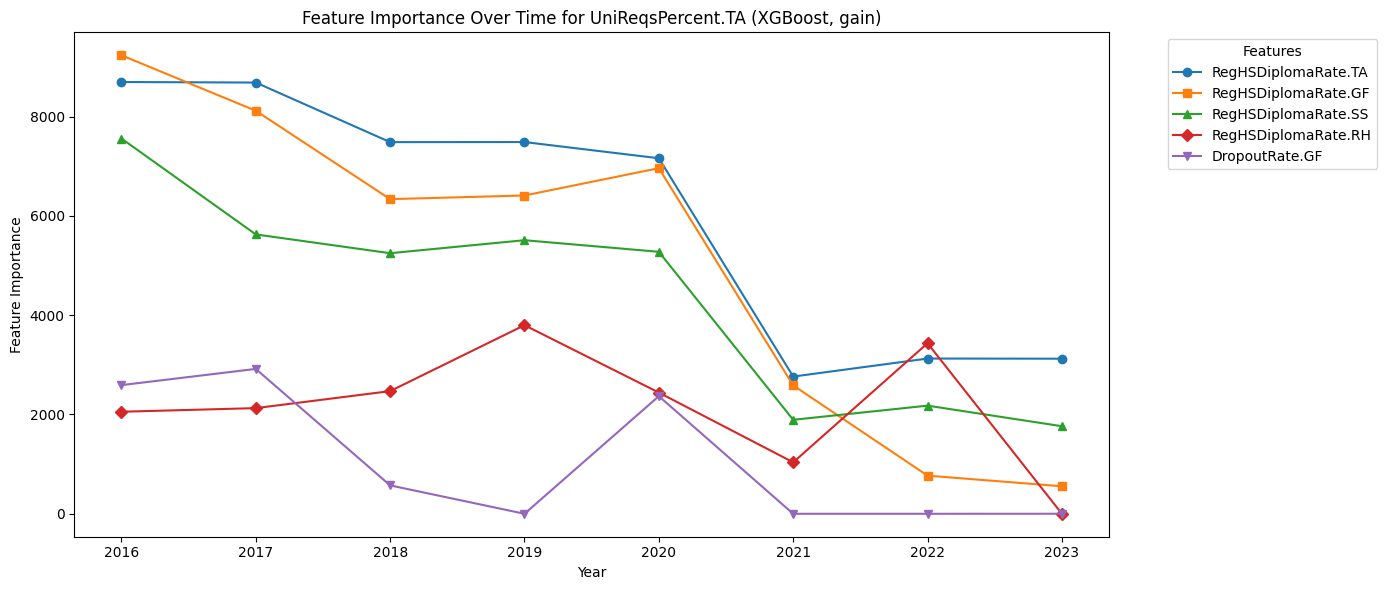

In [10]:
xgb.plot_feature_avg_variance(all_csu_rate_models, xgb_model, "gain", uc_csu_rate)
top_k_features = xgb.plot_top_k_features(
    all_csu_rate_models, xgb_model, "gain", uc_csu_rate, k=5
)
xgb.plot_feature_time_series(
    all_csu_rate_models, xgb_model, "gain", uc_csu_rate, top_k_features
)

## Random Forest


### Cross Validated Grad Rate


In [11]:
from modeling.utils.randomforest import (
    cross_validate_random_forest,
    plot_cv_feature_importance_rf,
    plot_top_k_features_rf,
    plot_feature_avg_variance_rf,
    plot_feature_time_series_rf,
)

cv_models = {}

target_variable = "RegHSDiplomaRate.TA"
years = list(year_df_mapping.keys())

for year in years:
    df = year_df_mapping[year]

    cv_result = cross_validate_random_forest(
        df=df,
        target_column=target_variable,
        columns_to_drop=grad_rate_columns_to_drop,
        n_splits=5,
        print_results=True,
        n_jobs=-1,
    )

    cv_models[year] = cv_result

Cross-Validation Results for RegHSDiplomaRate.TA (5 folds) for 2016-17:
RMSE: 5.7724 ± 0.3926
MAE: 2.7895 ± 0.0661
R²: 0.9529 ± 0.0046
Cross-Validation Results for RegHSDiplomaRate.TA (5 folds) for 2017-18:
RMSE: 5.2234 ± 0.3736
MAE: 2.7658 ± 0.2486
R²: 0.9597 ± 0.0060
Cross-Validation Results for RegHSDiplomaRate.TA (5 folds) for 2018-19:
RMSE: 4.9867 ± 0.4524
MAE: 2.5716 ± 0.1920
R²: 0.9588 ± 0.0073
Cross-Validation Results for RegHSDiplomaRate.TA (5 folds) for 2019-20:
RMSE: 5.8762 ± 0.3988
MAE: 2.9550 ± 0.1989
R²: 0.9441 ± 0.0078
Cross-Validation Results for RegHSDiplomaRate.TA (5 folds) for 2020-21:
RMSE: 6.0441 ± 0.3056
MAE: 3.1057 ± 0.1808
R²: 0.9370 ± 0.0072
Cross-Validation Results for RegHSDiplomaRate.TA (5 folds) for 2021-22:
RMSE: 8.9101 ± 0.7479
MAE: 4.4532 ± 0.3493
R²: 0.7948 ± 0.0472
Cross-Validation Results for RegHSDiplomaRate.TA (5 folds) for 2022-23:
RMSE: 10.2685 ± 1.1401
MAE: 5.3057 ± 0.2021
R²: 0.7499 ± 0.0278
Cross-Validation Results for RegHSDiplomaRate.TA (5 fo

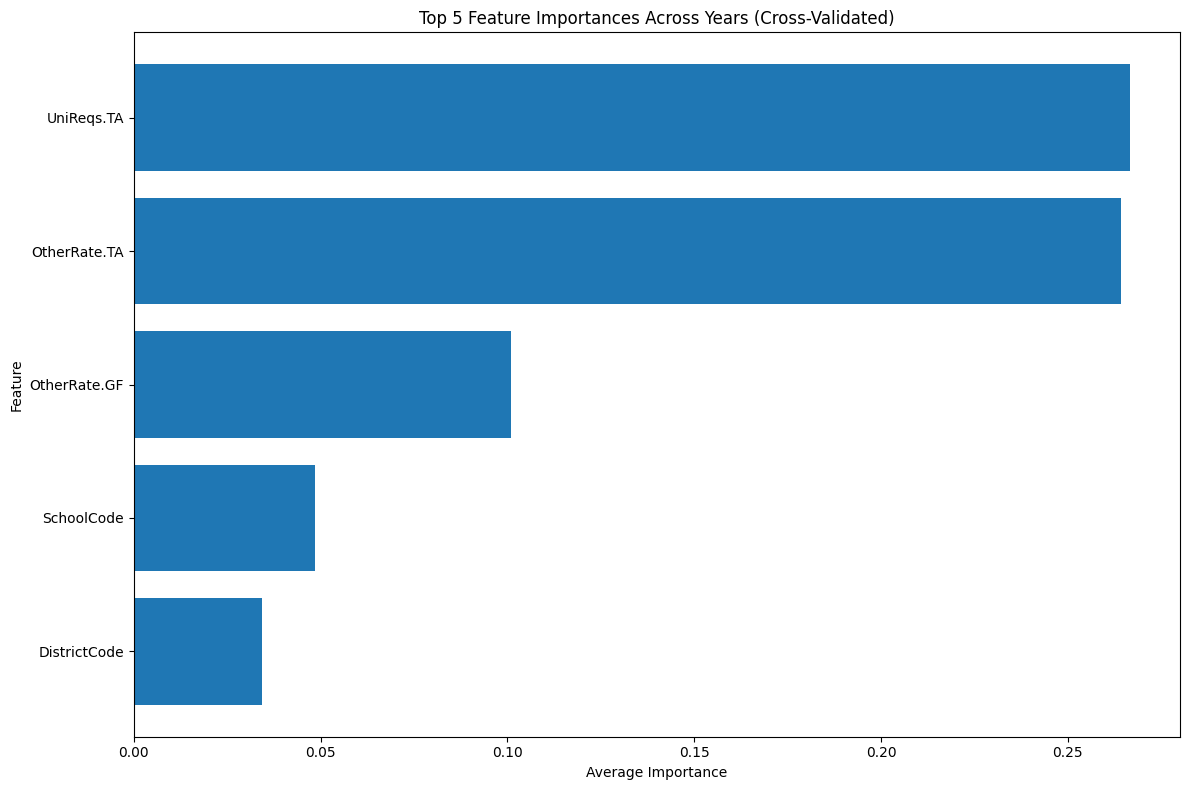

<Figure size 1400x600 with 0 Axes>

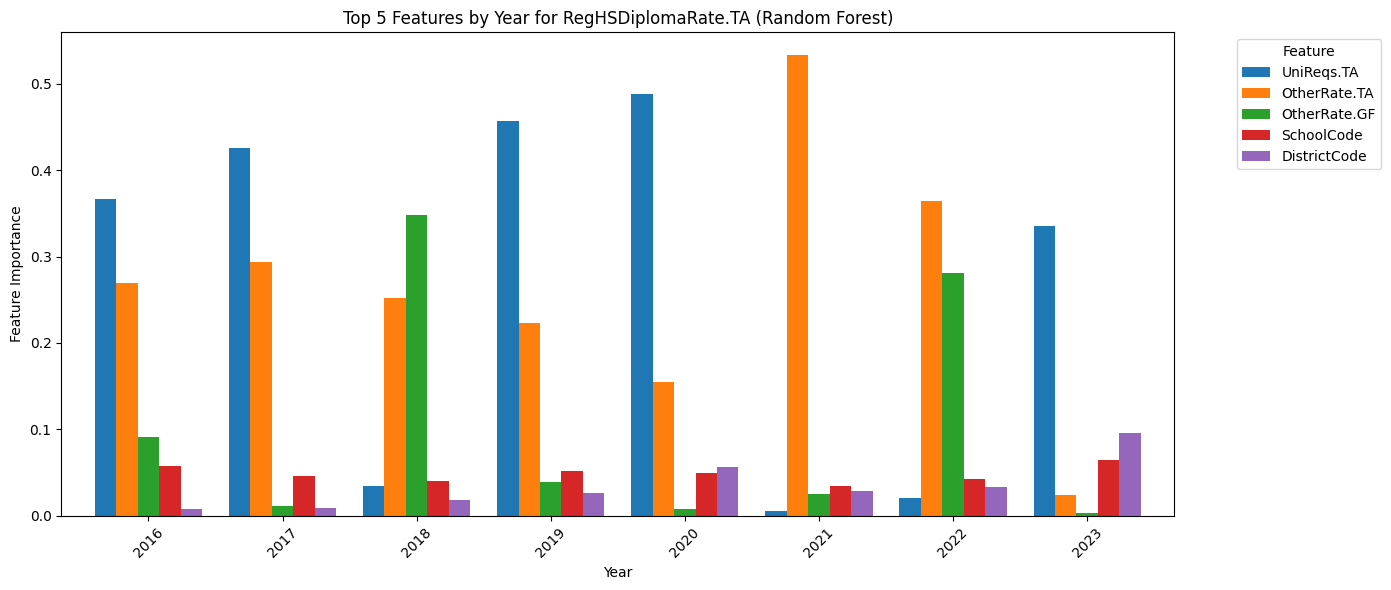

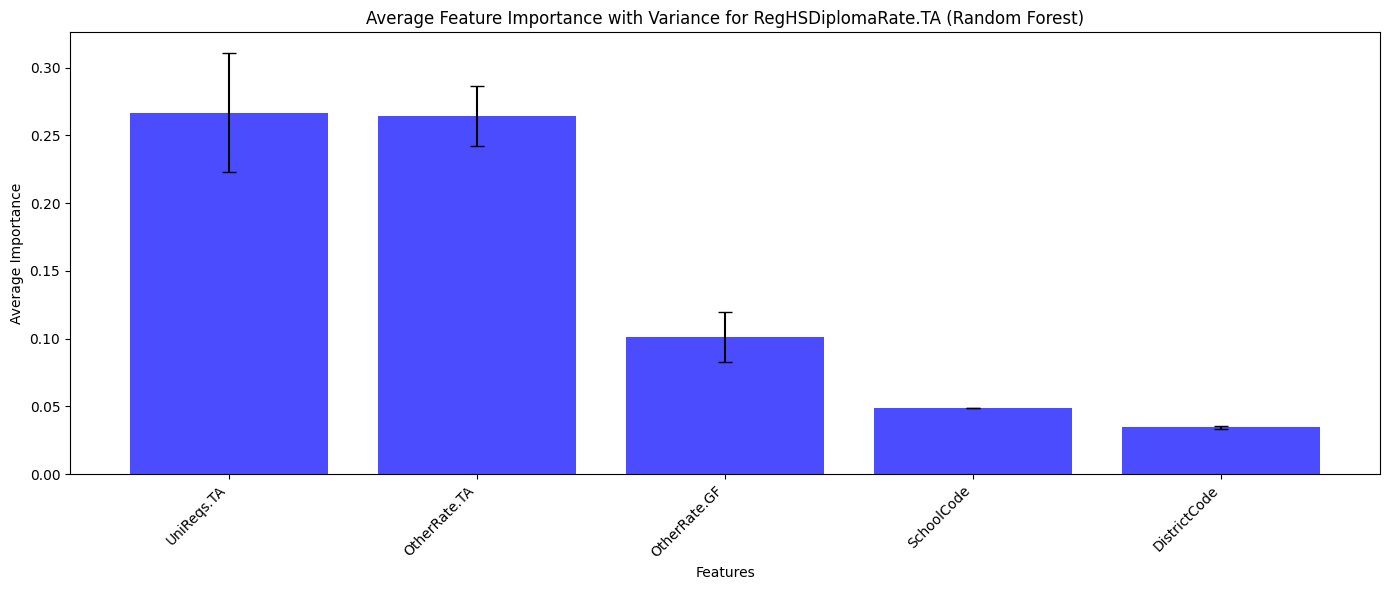

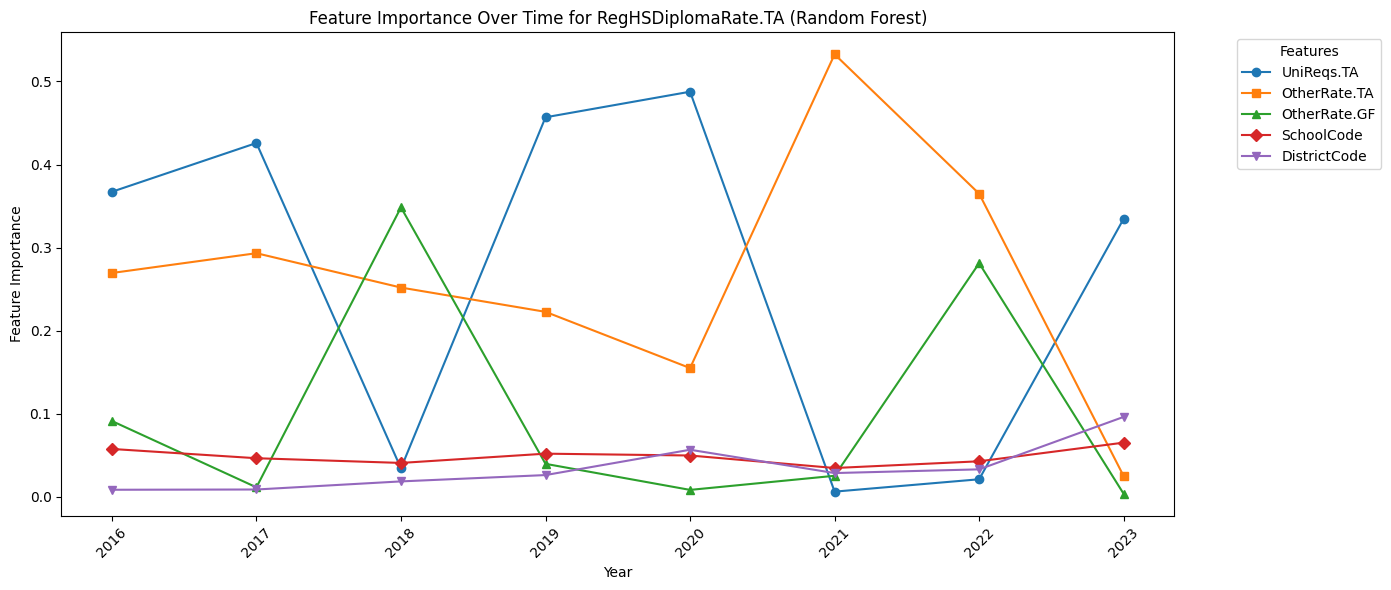

In [12]:
all_top_features = plot_cv_feature_importance_rf(cv_models, top_n=5)


plot_top_k_features_rf(cv_models, target_variable=target_variable, k=5)
plot_feature_avg_variance_rf(
    cv_models, target_variable=target_variable, top_k_features=all_top_features[:5]
)
plot_feature_time_series_rf(
    cv_models, target_variable=target_variable, top_k_features=all_top_features[:5]
)

### Cross Validated CSU/UC Readiness Rate


In [13]:
from modeling.utils.randomforest import (
    cross_validate_random_forest,
    plot_cv_feature_importance_rf,
    plot_top_k_features_rf,
    plot_feature_avg_variance_rf,
    plot_feature_time_series_rf,
)

cv_models = {}

target_variable = "UniReqsPercent.TA"
years = list(year_df_mapping.keys())

for year in years:
    df = year_df_mapping[year]

    cv_result = cross_validate_random_forest(
        df=df,
        target_column=target_variable,
        columns_to_drop=csu_rate_columns_to_drop,
        n_splits=5,
        print_results=True,
        n_jobs=-1,
    )

    cv_models[year] = cv_result

Cross-Validation Results for UniReqsPercent.TA (5 folds) for 2016-17:
RMSE: 7.9455 ± 0.3598
MAE: 4.6093 ± 0.2925
R²: 0.9190 ± 0.0078
Cross-Validation Results for UniReqsPercent.TA (5 folds) for 2017-18:
RMSE: 7.7092 ± 0.9361
MAE: 4.5849 ± 0.3771
R²: 0.9259 ± 0.0153
Cross-Validation Results for UniReqsPercent.TA (5 folds) for 2018-19:
RMSE: 8.3149 ± 0.5494
MAE: 4.9439 ± 0.2305
R²: 0.9157 ± 0.0108
Cross-Validation Results for UniReqsPercent.TA (5 folds) for 2019-20:
RMSE: 7.6257 ± 1.0704
MAE: 4.3696 ± 0.3201
R²: 0.9265 ± 0.0189
Cross-Validation Results for UniReqsPercent.TA (5 folds) for 2020-21:
RMSE: 7.7699 ± 0.7129
MAE: 4.6354 ± 0.2158
R²: 0.9275 ± 0.0150
Cross-Validation Results for UniReqsPercent.TA (5 folds) for 2021-22:
RMSE: 12.4279 ± 0.7316
MAE: 8.4806 ± 0.4474
R²: 0.8146 ± 0.0159
Cross-Validation Results for UniReqsPercent.TA (5 folds) for 2022-23:
RMSE: 14.1978 ± 1.3142
MAE: 9.6887 ± 0.7128
R²: 0.7657 ± 0.0479
Cross-Validation Results for UniReqsPercent.TA (5 folds) for 2023-2

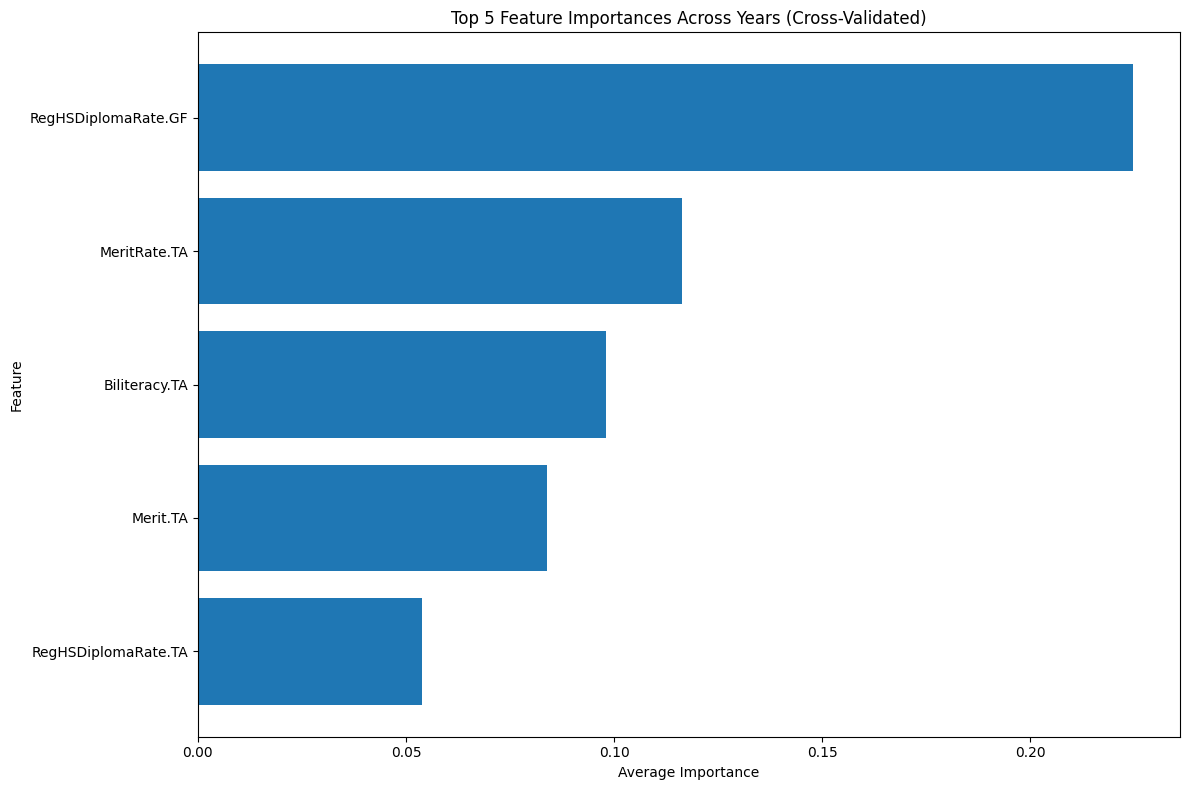

<Figure size 1400x600 with 0 Axes>

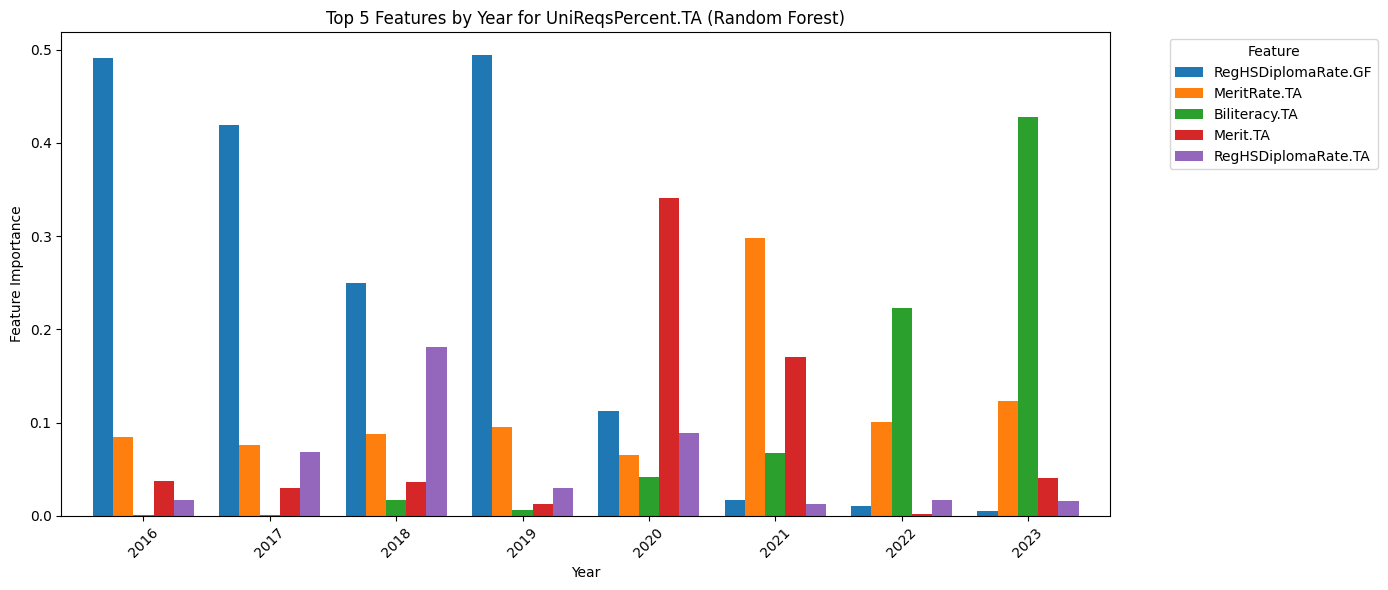

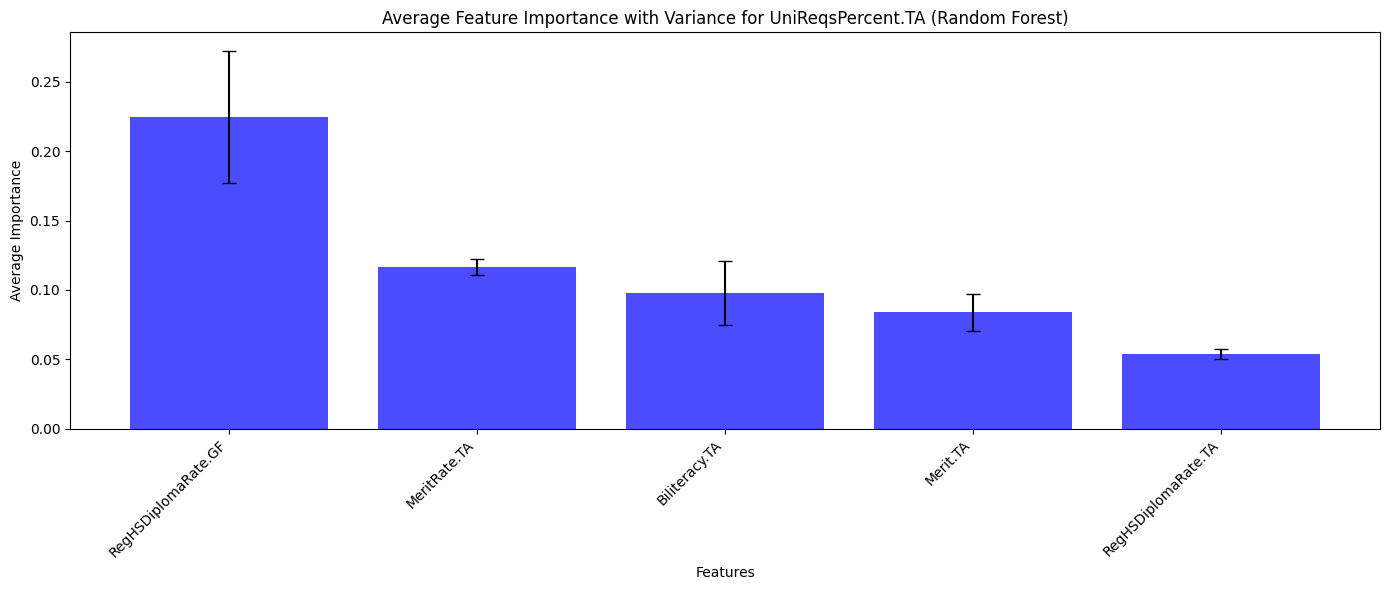

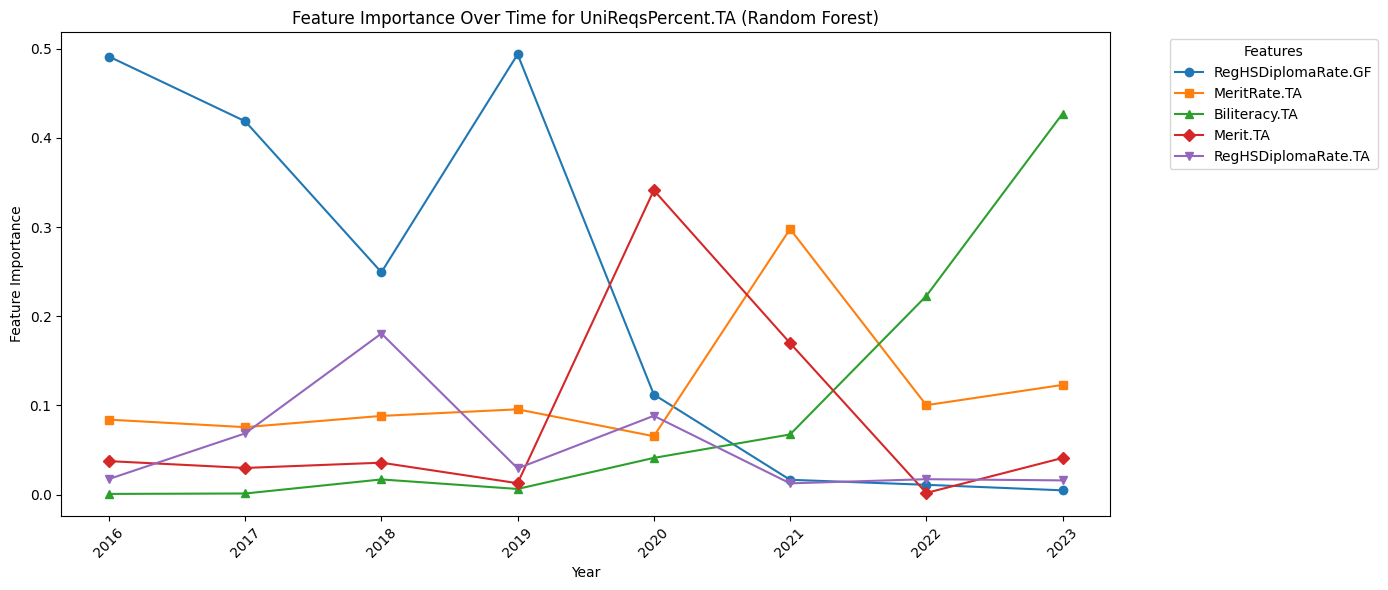

In [14]:
all_top_features = plot_cv_feature_importance_rf(cv_models, top_n=5)
plot_top_k_features_rf(cv_models, target_variable=target_variable, k=5)
plot_feature_avg_variance_rf(
    cv_models, target_variable=target_variable, top_k_features=all_top_features[:5]
)
plot_feature_time_series_rf(
    cv_models, target_variable=target_variable, top_k_features=all_top_features[:5]
)

### Non Cross-Validated Grad Rate


In [15]:
import modeling.utils.randomforest as rf

grad_rate = "RegHSDiplomaRate.TA"

all_rf_grad_rate_models = {}
for year, df in year_df_mapping.items():
    all_rf_grad_rate_models[year] = rf.train_random_forest_model(
        df, grad_rate, grad_rate_columns_to_drop, print_plot=False
    )

<Figure size 1400x600 with 0 Axes>

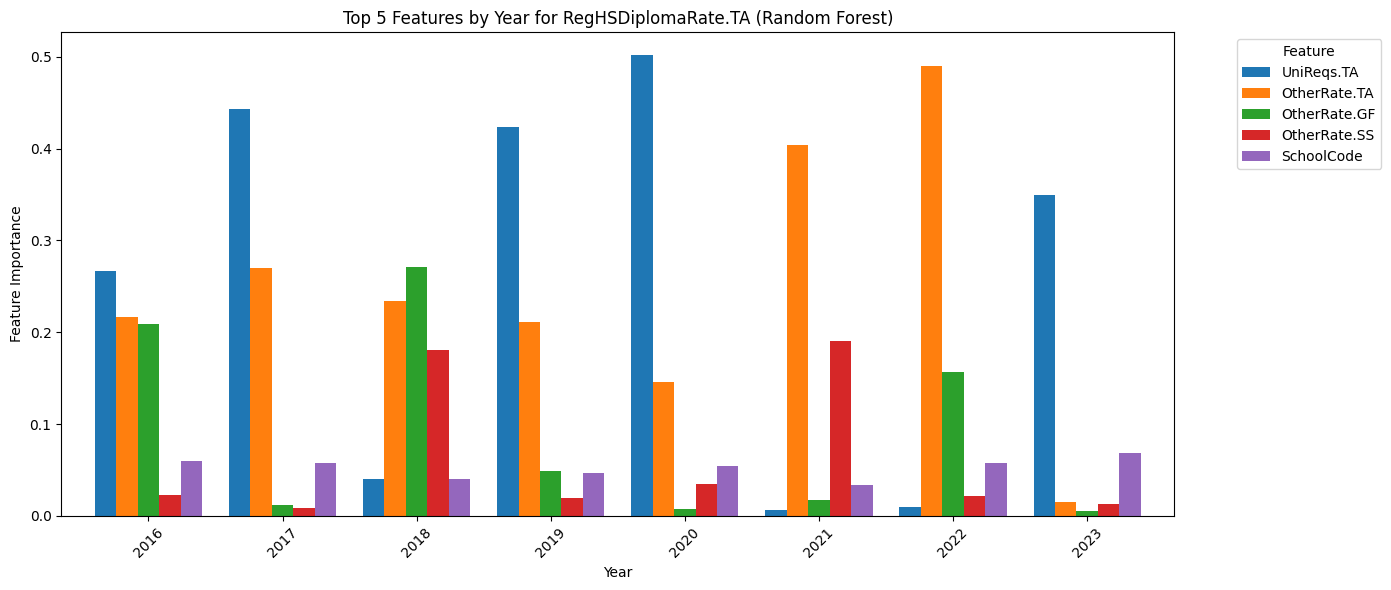

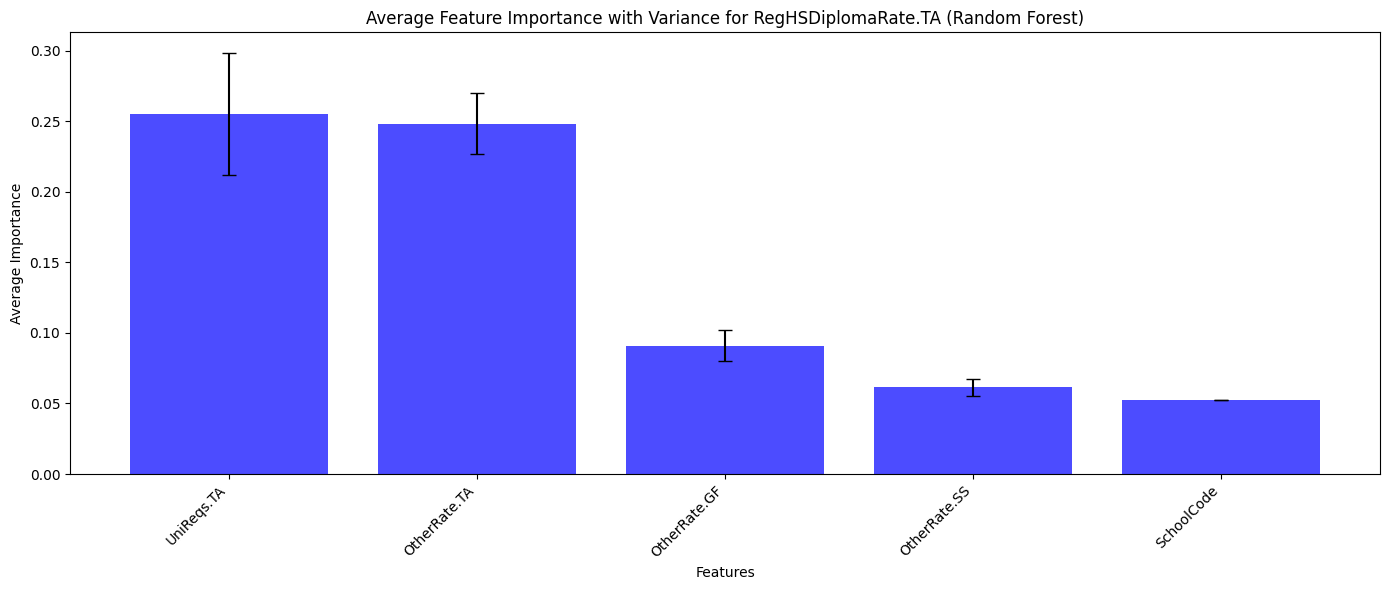

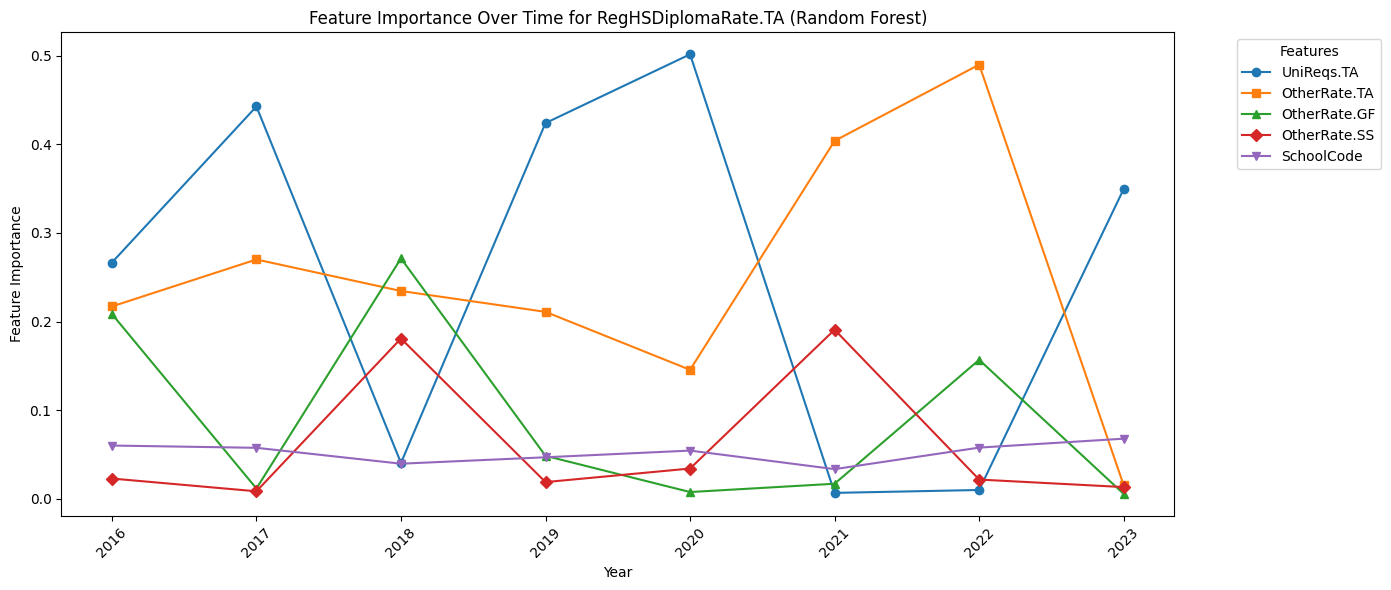

In [16]:
top_k_features_rf = rf.plot_top_k_features_rf(all_rf_grad_rate_models, grad_rate, k=5)

rf.plot_feature_avg_variance_rf(all_rf_grad_rate_models, grad_rate, top_k_features_rf)

rf.plot_feature_time_series_rf(all_rf_grad_rate_models, grad_rate, top_k_features_rf)

### Non Cross-Validated CSU/UC Readiness Rate


In [17]:
import modeling.utils.randomforest as rf

csu_uc_rate = "UniReqsPercent.TA"
rf_model = "RandomForest"

all_rf_csu_uc_rate_models = {}
for year, df in year_df_mapping.items():
    all_rf_csu_uc_rate_models[year] = rf.train_random_forest_model(
        df, csu_uc_rate, csu_rate_columns_to_drop, print_plot=False
    )

<Figure size 1400x600 with 0 Axes>

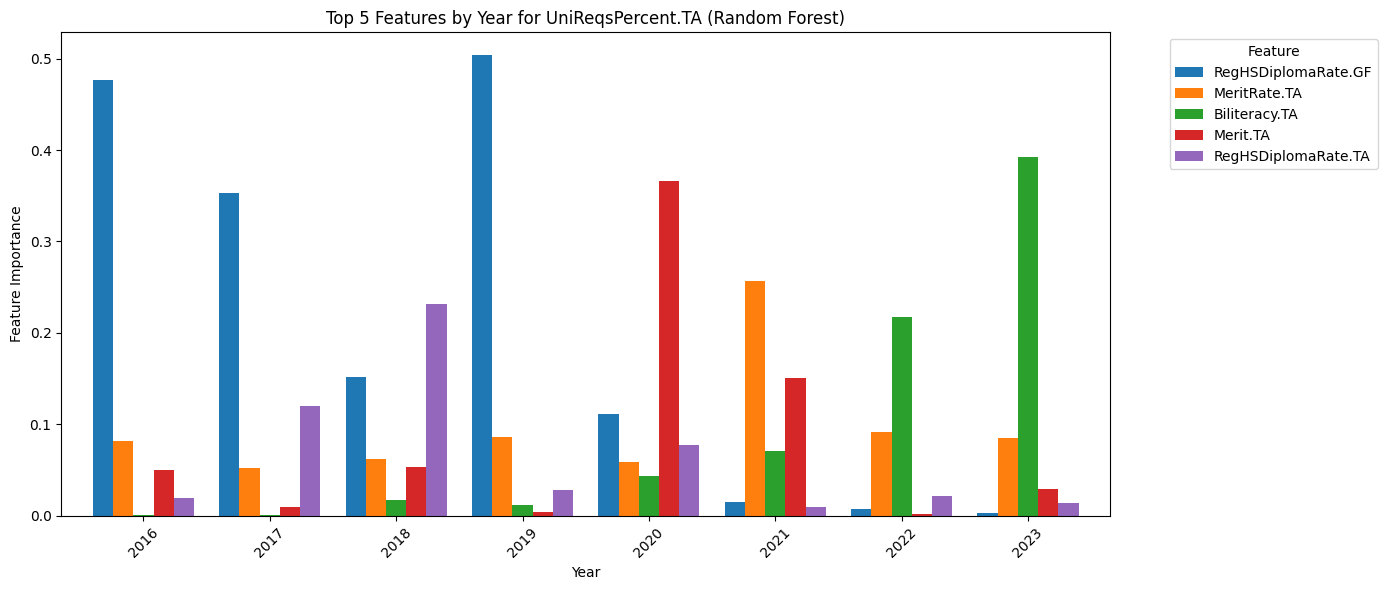

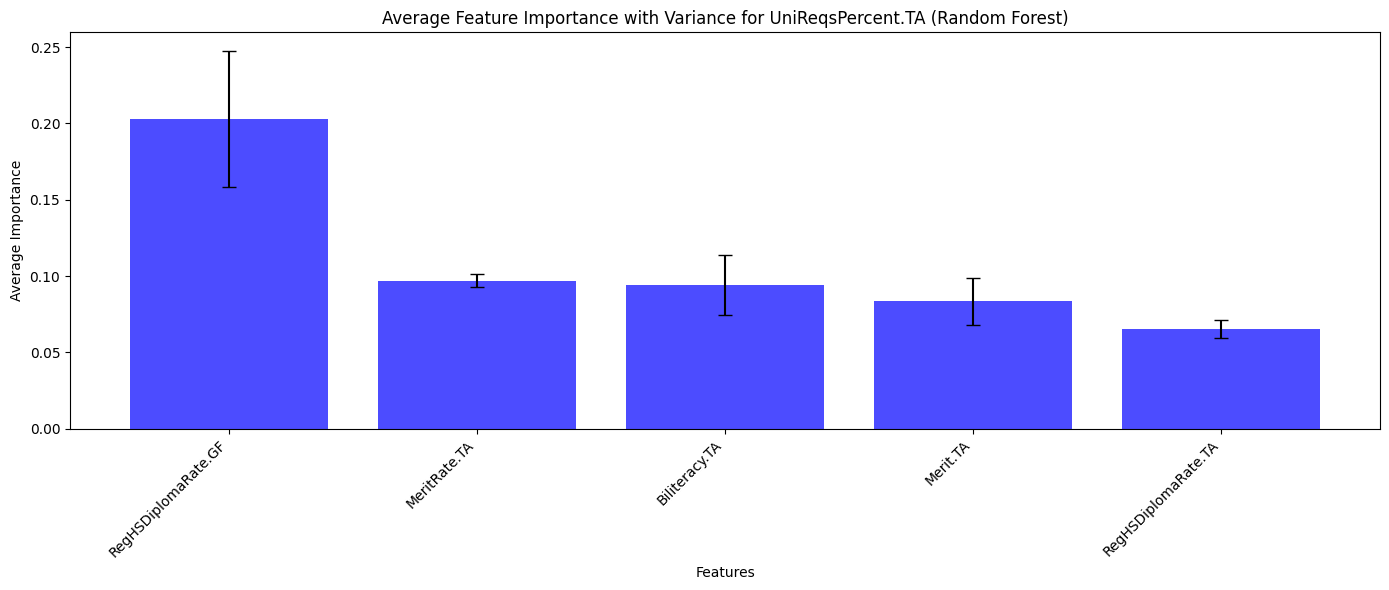

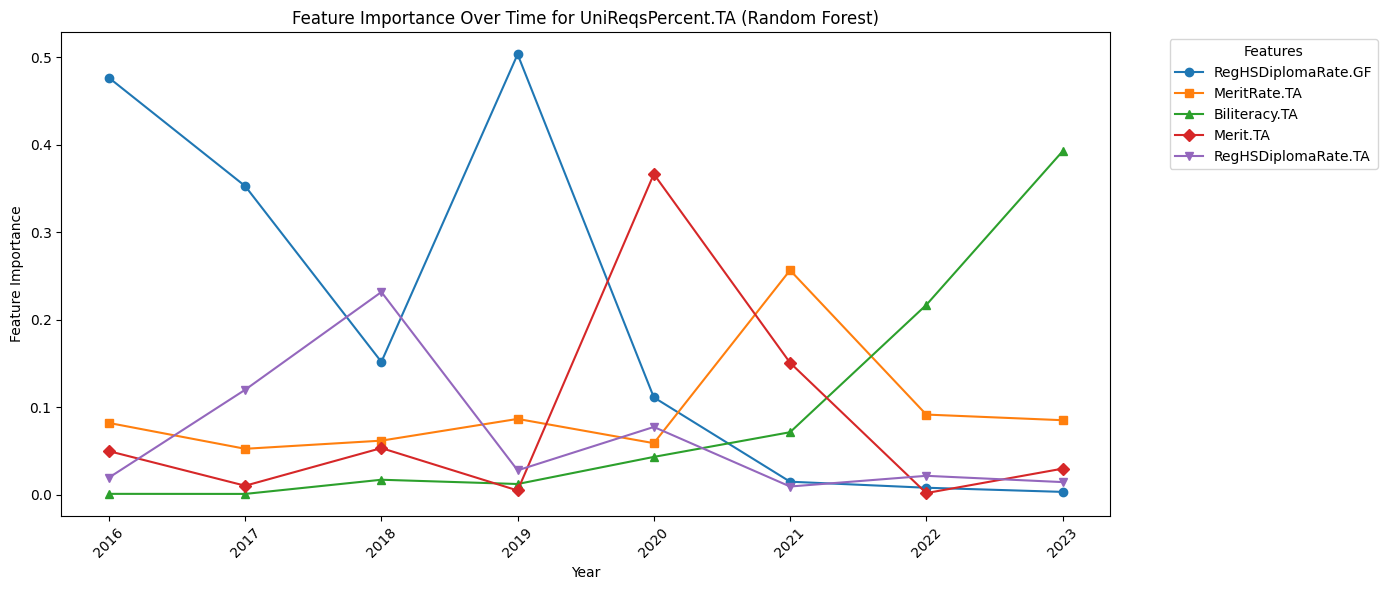

In [18]:
top_k_features_rf = rf.plot_top_k_features_rf(all_rf_csu_uc_rate_models, csu_uc_rate, k=5)

rf.plot_feature_avg_variance_rf(all_rf_csu_uc_rate_models, csu_uc_rate, top_k_features_rf)

rf.plot_feature_time_series_rf(all_rf_csu_uc_rate_models, csu_uc_rate, top_k_features_rf)

In [19]:
con.close()